# ***Homework Module 1***
---
---
In this homework, we're going to download finance data from various sources and make simple calculations/analysis.

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr
import pandas_datareader.data as web

# Data vizualization
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import time
from datetime import date

## **Question 1: [Macro] Average growth of GDP in 2023**
---
What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [18]:
start_2023, end_2023 = date(2022, 1, 1), date(2023, 12, 31)
print(f" - Start Date: {start_2023}\n - End Date: {end_2023}")

 - Start Date: 2022-01-01
 - End Date: 2023-12-31


In [17]:
# download GDPC1 data from FRED
gdp = web.DataReader("GDPC1", "fred", start_2023, end_2023)
# Calculate the YoY growth rate: (current quarter / same quarter last year - 1) * 100
gdp['YoY Growth'] = (gdp['GDPC1'] / gdp['GDPC1'].shift(4) - 1) * 100

# Filter out the data for 2023 and calculate the average YoY growth
average_growth_2023 = gdp['YoY Growth']['2023'].mean()

# Round to one decimal place
average_growth_2023 = round(average_growth_2023, 1)

# answer
print(f"The average YoY growth rate for 2023 is {average_growth_2023}%.")

The average YoY growth rate for 2023 is 2.5%.


## Question 2. [Macro] Inverse "Treasury Yield"
---
Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [21]:
start, end = date(2000, 1, 1), date.today()
print(f" - Start Date: {start}\n - End Date: {end}")

 - Start Date: 2000-01-01
 - End Date: 2024-04-23


In [27]:
# Get DGS2 and DGS10 data from FRED
yield_curve = web.DataReader(["DGS2", "DGS10"], "fred", start, end)

# Calculate the difference DGS10 - DGS2 daily
yield_curve['Spread'] = yield_curve['DGS10'] - yield_curve['DGS2']
display(yield_curve.head(3))

# Find minimum value of the spread and round to one decimal place
min_value = round(yield_curve['Spread'].min(), 1)

# Find the date of the minimum value
min_date = yield_curve['Spread'].idxmin()

# Answer output
print(f"The minimum value of DGS10 - DGS2 since the year 2000 is {min_value}% and occurred on {min_date.date()}.")

,DGS2,DGS10,Spread
DATE,,,
2000-01-03,6.38,6.58,0.20
2000-01-04,6.30,6.49,0.19
2000-01-05,6.38,6.62,0.24


The minimum value of DGS10 - DGS2 since the year 2000 is -1.1% and occurred on 2023-07-03.


### Analysis of Treasury Yield Curve (DGS10 and DGS2)

The terms **DGS10** and **DGS2** refer to the yields on U.S. Treasury securities with maturities of ten years and two years, respectively. These rates are important indicators in financial markets, reflecting investor sentiment and expectations about future economic conditions.

#### Key Points about Treasury Rates:
- **DGS10 (10-year Treasury Rate)**: Used to gauge long-term investor sentiment and economic outlook.
- **DGS2 (2-year Treasury Rate)**: More sensitive to immediate changes in Fed policies.

#### Yield Curve Analysis (DGS10 - DGS2):
- **Interest Rate Spread**: This spread helps assess the slope of the yield curve, which is a vital economic indicator.
  - **Normal Yield Curve**: Indicates economic growth expectations with higher long-term rates.
  - **Inverted Yield Curve**: Occurs when short-term rates exceed long-term rates, historically a predictor of economic recession.

#### Economic and Investment Implications:
- **Inverted Yield Curve and Market Outlook**:
  - An inverted yield curve is seen as a potential predictor of economic downturns. It reflects greater investor confidence in long-term investments compared to the short-term, often due to expected reductions in interest rates in response to economic slowdowns.
- **Global Relevance**:
  - Similar trends can be observed in different countries/markets, although specific economic conditions and monetary policies might alter local interpretations and impacts.
- **Predictive Feature in Models**:
  - The inverted yield curve can serve as a significant predictive feature in economic and financial models, indicating shifts in economic cycles and investor behavior.

#### *`Visualization:`*
- **Line Graph**: Plotting DGS10 and DGS2 over time with annotations on periods where the yield curve inverts (DGS10 - DGS2 < 0) can visually demonstrate how these inversions correlate with economic cycles. This visualization can help in identifying patterns related to economic recessions and recoveries.

> Understanding the dynamics between DGS10 and DGS2, and especially their spread, provides crucial insights into economic conditions and helps in making informed decisions in finance and economics.


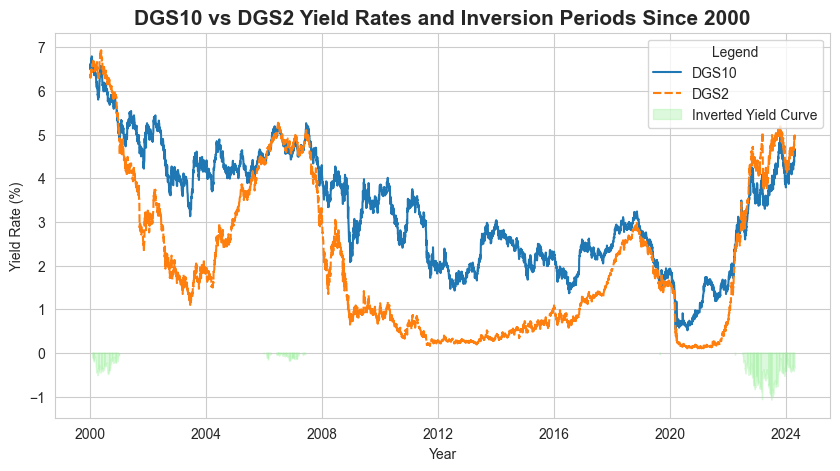

In [75]:
# Create a plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=yield_curve[['DGS10', 'DGS2']])
plt.fill_between(
    yield_curve.index, 0, yield_curve['Spread'], where=(yield_curve['Spread'] < 0),
    color='lightgreen', alpha=0.3, label='Inverted Yield Curve'
)
plt.title('DGS10 vs DGS2 Yield Rates and Inversion Periods Since 2000', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Yield Rate (%)')
plt.legend(title='Legend', loc='upper right')
plt.grid(True)
plt.show()

---

### Overview of Treasury Rates:
- **DGS2 (2-Year Treasury Rate)**: Reflects investor expectations for the Federal Reserve's short-term interest rate actions. Useful for assessing near-term economic outlook.
- **DGS10 (10-Year Treasury Rate)**: Indicates long-term economic expectations including growth and inflation. Serves as a benchmark for many other interest rates.

### Importance of Visualization:
- **Economic Indicators**: Visualizing these rates helps in understanding economic trends. An upward-sloping curve (DGS10 higher than DGS2) suggests a healthy, growing economy.
- **Recession Prediction**: An inverted yield curve (DGS2 higher than DGS10) often predicts economic recession. This critical insight is effectively highlighted in visualizations through shaded areas or markers when the curve inverts.

### Practical Use:
- **Investment Decisions**: Investors can decide on short-term vs. long-term bonds based on the yield curve.
- **Strategic Planning**: Businesses and investors can adjust strategies based on early economic signals from yield curve movements.

Visualization provides a clear, intuitive understanding of how economic conditions are changing, enabling informed financial decisions and strategic planning.

---

## Question 3. [Index] Which Index is better recently?
---
Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [45]:
# Define the ticker symbols for the S&P 500 and IPC Mexico indexes
tickers = ['^GSPC', '^MXX']

# Define the date range for the 5-year growth comparison
start_date = '2019-04-09'
end_date = '2024-04-09'

# Fetch the historical data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)
display(data.head(3))

# Closing prices are what we're interested in
closing_prices = data['Adj Close']

# Calculate the percentage growth over 5 years for each index
growth = ((closing_prices.iloc[-1] - closing_prices.iloc[0]) / closing_prices.iloc[0]) * 100

# Convert growth to integer for the answer
growth_int = growth.astype(int)

# Find the index with the higher growth
highest_growth_index = growth.idxmax()
highest_growth_value = growth_int[highest_growth_index]

# Answer output
print(f"\nThe S&P 500 index (^GSPC) has experienced the highest growth of {highest_growth_value}% over the past 5 years.")
print("\n5-Year Growth Comparison:")
growth_int.to_frame(name='5-Year Growth (%)').T

[*********************100%%**********************]  2 of 2 completed


Price         Adj Close                      Close                       High  \
Ticker            ^GSPC          ^MXX        ^GSPC          ^MXX        ^GSPC   
Date                                                                            
2019-04-09  2878.199951  45151.628906  2878.199951  45151.628906  2886.879883   
2019-04-10  2888.209961  44909.140625  2888.209961  44909.140625  2889.709961   
2019-04-11  2888.320068  44580.058594  2888.320068  44580.058594  2893.419922   

Price                             Low                       Open  \
Ticker              ^MXX        ^GSPC          ^MXX        ^GSPC   
Date                                                               
2019-04-09  45346.828125  2873.330078  44854.531250  2886.580078   
2019-04-10  45219.410156  2879.129883  44850.109375  2881.370117   
2019-04-11  44966.500000  2881.989990  44373.488281  2891.919922   

Price                           Volume               
Ticker              ^MXX         ^GSPC         ^MXX  
Date                                                 
2019-04-09  45346.828125  3.032480e+09  191575000.0  
2019-04-10  45204.750000  3.092230e+09  145314900.0  
2019-04-11  44872.531250  2.970650e+09  109090000.0


The S&P 500 index (^GSPC) has experienced the highest growth of 80% over the past 5 years.

5-Year Growth Comparison:


Ticker,^GSPC,^MXX
5-Year Growth (%),80,28


---

## 5-Year Growth Comparison of S&P 500 and IPC Mexico

### Results:
- **S&P 500 (^GSPC)**: The S&P 500 showed a substantial 5-year growth of **80%**.
- **IPC Mexico (^MXX)**: In contrast, the IPC Mexico index exhibited a 5-year growth of **28%**.

### Interpretation:
These results indicate that over the past five years, the S&P 500 has significantly outperformed the IPC Mexico index in terms of overall growth. The S&P 500's higher growth percentage reflects stronger market performance and potentially greater economic stability and investor confidence in the U.S. market compared to Mexico.

### Why These Metrics Matter:
- **Economic Indicator**: Stock indices like the S&P 500 and IPC Mexico serve as *`barometers for the economic health`* of their respective regions. A higher growth rate can indicate stronger economic activity and investor optimism.
- **Investment Decision Making**: Investors use such growth figures to assess where to allocate capital. The higher growth in the S&P 500 might attract more global investment to the U.S. equity market.
- **Risk Assessment**: Comparing growth rates helps in understanding the relative risk and return profiles of different markets. Markets with higher growth rates are often perceived as having higher potential returns, but possibly with greater volatility.

### What These Metrics Are:
- **5-Year Growth (%)**: This metric measures the percentage increase or decrease in the value of the stock index over a period of five years. It provides a snapshot of long-term financial market performance and helps gauge the growth trajectory of investment values in those markets.

The substantial difference in growth between these two indices highlights the diverging market dynamics and economic conditions in the U.S. and Mexico, influencing strategic investment decisions and economic analyses.


---

/var/folders/20/y44pt9c51ts69c9fjlbm2glh0000gn/T/ipykernel_73984/565268744.py:2: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/var/folders/20/y44pt9c51ts69c9fjlbm2glh0000gn/T/ipykernel_73984/565268744.py:3: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



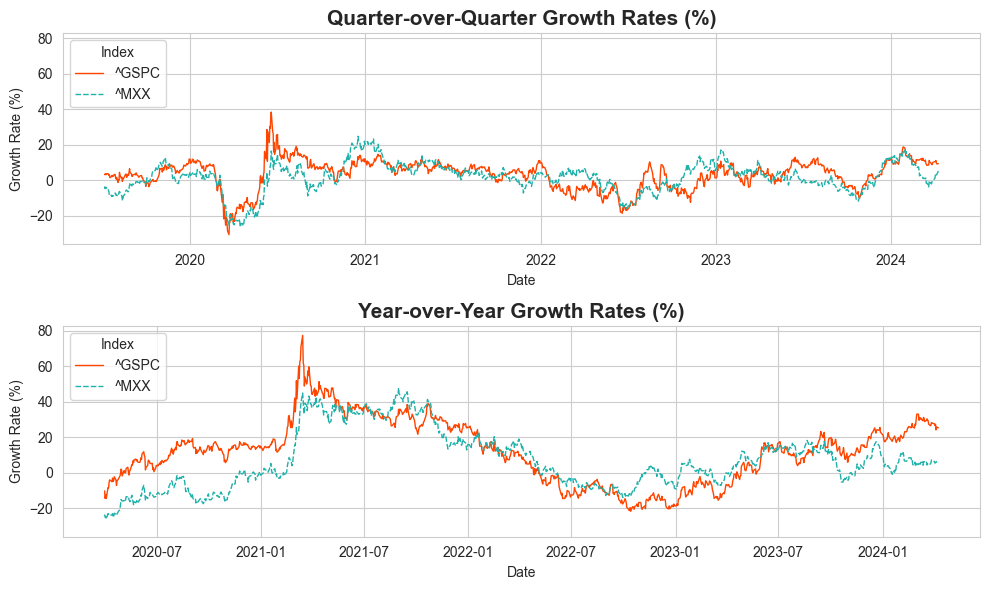

In [61]:
# Calculate Quarter-over-Quarter and Year-over-Year growth rates
qoq_growth = closing_prices.pct_change(periods=63) * 100  # Approx. one quarter
yoy_growth = closing_prices.pct_change(periods=252) * 100  # Approx. one year

# Plotting the QoQ and YoY growth rates over time with 2 rows and 1 column (seaborn)
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharey=True)

# Plotting the QoQ growth rates
sns.lineplot(data=qoq_growth, ax=axes[0], palette=['orangered', 'lightseagreen'], linewidth=1)
axes[0].set_title('Quarter-over-Quarter Growth Rates (%)', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Growth Rate (%)')
# legend
axes[0].legend(title='Index', loc='upper left')

# Plotting the YoY growth rates
sns.lineplot(data=yoy_growth, ax=axes[1], palette=['orangered', 'lightseagreen'], linewidth=1)
axes[1].set_title('Year-over-Year Growth Rates (%)', fontsize=15, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Growth Rate (%)')
axes[1].legend(title='Index', loc='upper left')


fig.tight_layout()

---

## Growth Rate Visualization Analysis

### Overview
This visualization presents the QoQ and YoY growth rates for two market indices, providing insights into both short-term and long-term market trends.

### Features
- **QoQ Growth Rates**: The top subplot highlights short-term economic changes. Fluctuations indicate quarterly financial events or market adjustments.
- **YoY Growth Rates**: The bottom subplot reveals long-term trends, smoothing out short-term volatilities. This view is essential for assessing sustained market performance.
- **Visual Aids**: Both plots use distinct colors for each index, enhancing clarity. Titles, axes labels, and legends are clearly marked, aiding in quick interpretation.

### Interpretation
- **Short-term Strategy**: Rapid changes in the QoQ plot guide immediate investment adjustments.
- **Long-term Planning**: Trends in the YoY plot inform longer-term strategies and economic health assessments.

These visualizations are crucial for stakeholders to make informed decisions based on recent and historical growth patterns of the indices.

---

### *`Additional: Indices for Technology-Focused Investments`*
---
- think of other indices and try to download stats and compare the growth?
- Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?
#
CGAR:
- The Compound Annual Growth Rate (CAGR) is used to represent the smoothed annual growth rate over a specified time period, accounting for the compounding effect. It is a useful measure to compare the performance of different investments or financial metrics over time.
#
- Formula:

$$
\text{CAGR} = \left(\frac{\text{Ending Value}}{\text{Starting Value}}\right)^{\frac{1}{\text{Number of Periods}}} - 1
$$

  Where:
  - **Ending Value** is the final value of the investment or index at the end of the period.
  - **Starting Value** is the initial value of the investment or index at the beginning of the period.
  - **Number of Periods** is the total number of years (or other time units) over which the investment or index has been held.
#
> This formula provides the average annual rate of return, assuming that the returns are compounded each year.

---
#
#### *`Investment Strategy for AI-Focused Companies`*

##### Recommended Indices:
- **NASDAQ 100 (NDX)**: Comprises major tech companies including AI leaders like NVIDIA and Microsoft.
- **Philadelphia Semiconductor Index (SOXX)**: Focuses on the semiconductor industry, crucial for AI hardware.
- **Dow Jones Technology Sector Index (DJUSTC)**: Encompasses a broad range of tech companies within the Dow Jones.

##### Growth Comparison and CAGR Calculation:

##### Steps:
1. **Data Retrieval**: Use platforms like Yahoo Finance to download daily prices for indices over 5, 10, and 20 years.
2. **Growth Calculation**:
   - Formula: 
$$
\text{Growth Rate (\%)} = \left(\frac{\text{End Value} - \text{Start Value}}{\text{Start Value}}\right) \times 100
$$
3. **CAGR**:
   - Formula:
$$
\text{CAGR} = \left(\frac{\text{Ending Value}}{\text{Starting Value}}\right)^{\frac{1}{\text{Number of Years}}} - 1
$$
   - Provides annual growth rate considering compounding.

##### Visualization and Analysis:
- **Trend Analysis**: Plot index values to assess trends and fluctuations.
- **Index Comparison**: Determine which index demonstrates superior growth and CAGR.

##### Conclusion:
This approach equips investors with insights to align their portfolios with high-performing tech indices, optimizing potential returns in AI investments. Monitoring CAGR and growth trends helps in making informed decisions about long-term investments in the technology sector.

- Fetch Data:

In [93]:
today            = date.today()
twenty_years_ago = today.replace(year=today.year - 20)
ten_years_ago    = today.replace(year=today.year - 10)
five_years_ago    = today.replace(year=today.year - 5)

# retrieve NASDAQ 100 (NDX), Philadelphia Semiconductor Index (SOX), Dow Jones Technology Sector Index (DJUSTC)
data = yf.download(tickers=['^NDX', '^SOX'], start=twenty_years_ago, end=today)["Adj Close"]

print(f"Data Shape: {data.shape}\n")
print(data.isnull().sum())
data.head(3)

[*********************100%%**********************]  2 of 2 completed

Data Shape: (5033, 2)

Ticker
^NDX    0
^SOX    0
dtype: int64


Ticker,^NDX,^SOX
Date,,
2004-04-23,1497.010010,487.744019
2004-04-26,1480.530029,474.520386
2004-04-27,1479.469971,468.103485


In [94]:
# Segment data for different time frames
data_20y = data.loc[twenty_years_ago:today]
data_10y = data.loc[ten_years_ago:today]
data_5y  = data.loc[five_years_ago:today]

- Metrics computation:

In [108]:
from datetime import date
from typing import Tuple

def date_diff_in_years(start_date: date, end_date: date) -> float:
    " Calculate the difference in years between two dates."
    return (end_date - start_date).days / 365.25  # includes leap years


def calculate_growth_and_cagr(data:pd.DataFrame, start_date: date, end_date:date) -> Tuple[pd.Series, pd.Series]:
    """ Calculate the growth and CAGR for a given time frame.
    """
    # Calculate the number of years
    num_years = date_diff_in_years(start_date, end_date)

    # Growth calculation
    start_values = data.iloc[0]
    end_values   = data.iloc[-1]
    growth       = ((end_values - start_values) / start_values) * 100

    # CAGR calculation
    cagr = ((end_values / start_values) ** (1 / num_years)) - 1

    return growth, cagr


# Perform calculations for each time frame
growth_20y, cagr_20y = calculate_growth_and_cagr(data_20y, twenty_years_ago, today)
growth_10y, cagr_10y = calculate_growth_and_cagr(data_10y, ten_years_ago, today)
growth_5y, cagr_5y   = calculate_growth_and_cagr(data_5y, five_years_ago, today)

# merge the results into a single DataFrame
growth_df = pd.concat([growth_20y, growth_10y, growth_5y], axis=1)
cagr_df   = pd.concat([cagr_20y, cagr_10y, cagr_5y], axis=1)

# Rename the columns
growth_df.columns = ['20-Year Growth (%)', '10-Year Growth (%)', '5-Year Growth (%)']
cagr_df.columns   = ['20-Year CAGR (%)', '10-Year CAGR (%)', '5-Year CAGR (%)']



- Visualization:

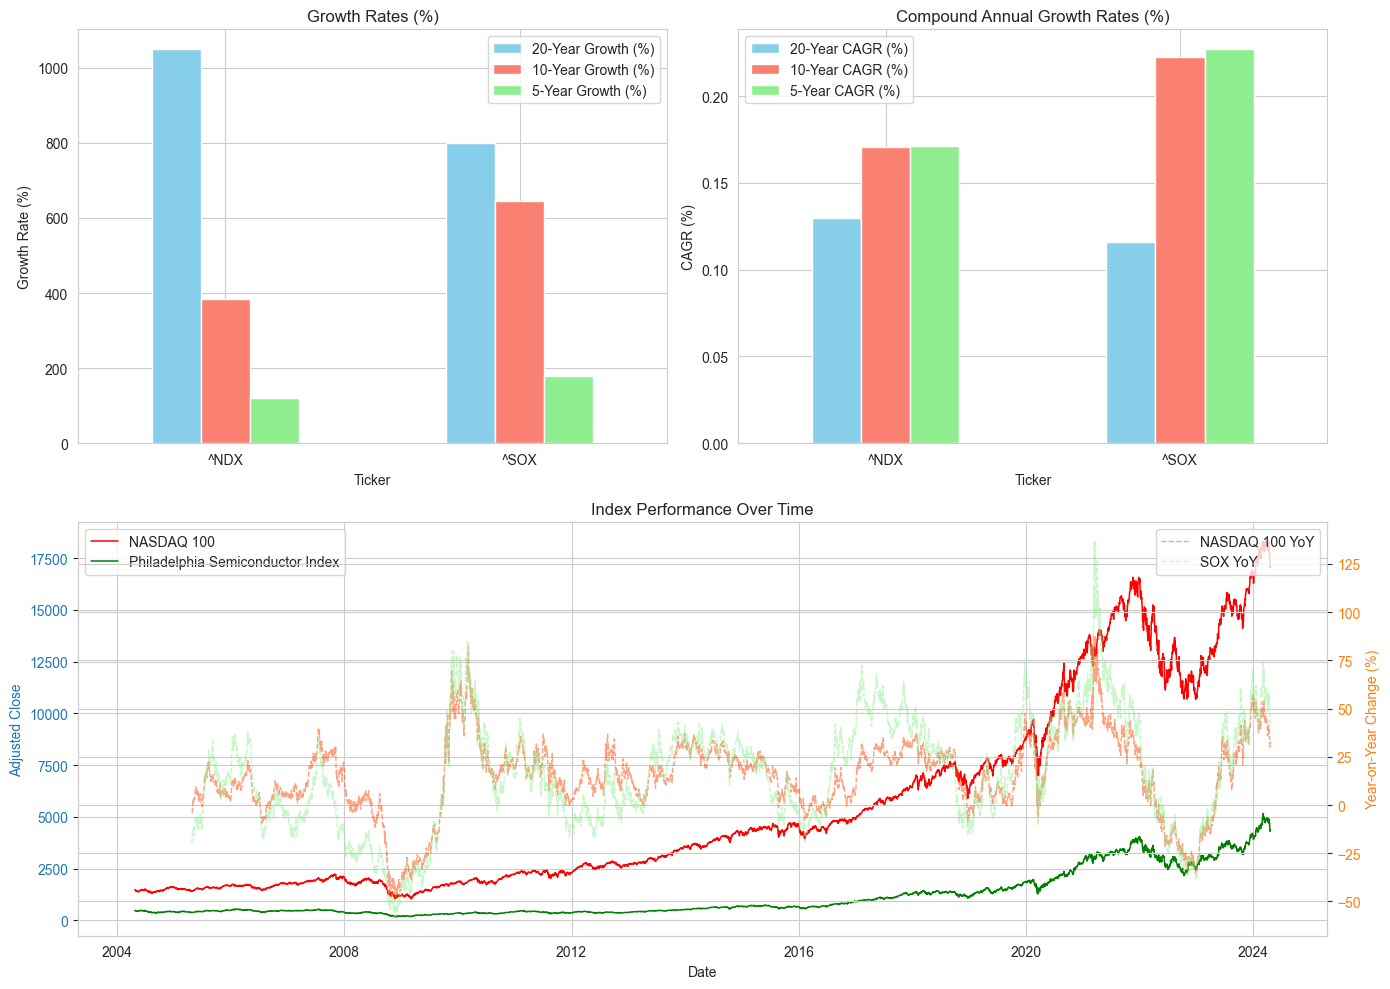

In [115]:
# add yoy for both indexes
data['^NDX YoY'] = data['^NDX'].pct_change(periods=252) * 100
data['^SOX YoY'] = data['^SOX'].pct_change(periods=252) * 100


# Create the figure with specified dimensions
# ============================================
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# Bar plots
# --------------------------------
ax0 = plt.subplot(gs[0, 0])
growth_df.plot(kind='bar', ax=ax0, color=['skyblue', 'salmon', 'lightgreen'], rot=0)
ax0.set_title('Growth Rates (%)')
ax0.set_ylabel('Growth Rate (%)')
ax0.grid(True)

ax1 = plt.subplot(gs[0, 1])
cagr_df.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon', 'lightgreen'], rot=0)
ax1.set_title('Compound Annual Growth Rates (%)')
ax1.set_ylabel('CAGR (%)')
ax1.grid(True)


# Time series plot
# --------------------------------
# Time series plot with secondary y-axis for YoY changes
ax2 = plt.subplot(gs[1, :])  # Span across both columns in the second row
ax2.set_title('Index Performance Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Adjusted Close', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.plot(data.index, data['^NDX'], label='NASDAQ 100', color='red', linewidth=1.1)
ax2.plot(data.index, data['^SOX'], label='Philadelphia Semiconductor Index', color='green', linewidth=1.1)
ax2.legend(loc='upper left')

# Create a second y-axis for YoY changes
ax3 = ax2.twinx()
ax3.set_ylabel('Year-on-Year Change (%)', color='tab:orange')
ax3.tick_params(axis='y', labelcolor='tab:orange')
ax3.plot(data.index, data['^NDX YoY'], label='NASDAQ 100 YoY', color='orangered', linestyle='--', linewidth=1, alpha=0.5)
ax3.plot(data.index, data['^SOX YoY'], label='SOX YoY', color='lightgreen', linestyle='--', linewidth=1, alpha=0.5)
ax3.legend(loc='upper right')

plt.tight_layout()

## Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
---
Find the largest range ratio of Adj.Close prices in 2023.

$$
\text{Range Ratio} = \frac{\text{Max(Adj.Close)} - \text{Min(Adj.Close)}}{\text{Max(Adj.Close)}}
$$

---
The range ratio is a financial metric used to assess the volatility of a stock's price over a designated period by comparing its highest and lowest adjusted closing prices. It provides a quantitative measure of how much the price has fluctuated relative to its highest point during the period.

#### Interpretation

- ***Higher Range Ratio:*** Indicates greater volatility. A high ratio suggests that the stock's price has experienced significant drops from its peak during the period, which may be seen as higher risk or potential for high returns.
#
- ***Lower Range Ratio:*** Indicates less volatility. A low ratio suggests that the stock's price has been relatively stable, staying closer to its peak, which might be preferred by risk-averse investors.

---
#
Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [25]:
# List of stock symbols
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Download 2023 daily OHLCV data for each stock
data = {
    stock: yf.download(stock, start='2023-01-01', end='2023-12-31') for stock in stocks
}

# Calculate the range ratio for each stock
range_ratios = {}

for stock, df in data.items():
    max_adj_close       = df['Adj Close'].max()
    min_adj_close       = df['Adj Close'].min()
    range_ratio         = ( max_adj_close - min_adj_close ) / min_adj_close
    range_ratios[stock] = round(range_ratio, 2)

# Convert the dictionary to a DataFrame and colorcode the cells
range_ratios_df = pd.DataFrame(
    data  = range_ratios,
    index = ['Range Ratio']
).T.style.background_gradient(cmap='coolwarm')

# Find the stock with the largest range ratio
max_range_stock = max(range_ratios, key=range_ratios.get)
max_range_ratio = range_ratios[max_range_stock]

print("\nStock with the largest range ratio in 2023:", max_range_stock)
print("Largest range ratio:", max_range_ratio)

# Display the DataFrame
range_ratios_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Stock with the largest range ratio in 2023: MSFT
Largest range ratio: 0.74


,Range Ratio
2222.SR,0.270000
BRK-B,0.260000
AAPL,0.590000
MSFT,0.740000
GOOG,0.650000
JPM,0.390000


---
**`The range ratio measures the extent of price fluctuations of a stock by calculating the difference between the highest and lowest adjusted close prices within a specified period, relative to the highest price. This metric indicates the volatility of the stock, with a higher range ratio showing more significant price movements and suggesting greater risk. For trading strategies, a higher range ratio implies potential for higher returns if trades are timed correctly, as it helps traders assess the opportunities and risks associated with the stock's volatility, guiding decisions about optimal entry and exit points in the market.`**

---

## Question 5. [Stocks] Dividend Yield
---
Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximum value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [7]:
ticker  = yf.Ticker('GOOG')
actions = ticker.get_actions()
actions

hist_data = ticker.history(start="2023-01-01", end="2023-12-31")
hist_data.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,89.830002,91.550003,89.019997,89.699997,20738500,0.0,0.0
2023-01-04 00:00:00-05:00,91.010002,91.239998,87.800003,88.709999,27046500,0.0,0.0
2023-01-05 00:00:00-05:00,88.070000,88.209999,86.559998,86.769997,23136100,0.0,0.0


In [6]:
import yfinance as yf
import pandas as pd

# List of stock symbols
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Initialize dictionary to store final dividend yields
dividend_yields = {}

# Process each stock
for stock in stocks:
    ticker  = yf.Ticker(stock)
    actions = ticker.get_actions()

    # Check if 'Dividends' column exists and filter dividends for 2023
    if 'Dividends' in actions.columns:
        if not isinstance(actions.index, pd.DatetimeIndex):
            actions.index = pd.to_datetime(actions.index)
        dividends_2023 = actions['Dividends'][actions.index.year == 2023].sum()
    else:
        dividends_2023 = 0

    # Get the historical price data for 2023, and find the last available closing price
    hist_data = ticker.history(start="2023-01-01", end="2023-12-31")
    if not hist_data.empty:
        last_price_2023 = hist_data['Close'].iloc[-1]
    else:
        last_price_2023 = None

    # Calculate dividend yield if last price data is available
    if last_price_2023 and dividends_2023 > 0:
        dividend_yield         = (dividends_2023 / last_price_2023) * 100
        dividend_yields[stock] = round(dividend_yield, 1)

# Find the maximum dividend yield
if dividend_yields:
    max_yield_stock = max(dividend_yields, key=dividend_yields.get)
    max_yield_value = dividend_yields[max_yield_stock]
    print("Stock with the largest dividend yield in 2023:", max_yield_stock)
    print("Largest dividend yield:", max_yield_value, "%")
else:
    print("No dividend data available for the stocks in 2023.")

# Optionally, convert the dictionary to a DataFrame for better visualization
dividend_yields_df = pd.DataFrame(
    data    = list(dividend_yields.items()),
    columns = ['Stock', 'Dividend Yield (%)']
)
dividend_yields_df.style.background_gradient(cmap='coolwarm')

Stock with the largest dividend yield in 2023: 2222.SR
Largest dividend yield: 2.8 %


,Stock,Dividend Yield (%)
0,2222.SR,2.800000
1,AAPL,0.500000
2,MSFT,0.700000
3,JPM,2.400000


## Question 6. [Exploratory] Investigate new metrics
---
## Key Metrics for AI Asset Trading Strategy

### 1. Earnings Per Share (EPS)
- **Purpose**: Indicates the profitability of a company, essential for evaluating its financial health and operational efficiency.
- **Sources**: Financial websites like Yahoo Finance, Bloomberg; direct company reports.

### 2. Price-to-Earnings (P/E) Ratio
- **Purpose**: Helps determine if the stock is priced appropriately relative to its earnings, crucial for assessing valuation in comparison to industry peers.
- **Sources**: Financial websites (Yahoo Finance, Google Finance), company financial disclosures.

### 3. Revenue Growth
- **Purpose**: Critical for AI companies as it reflects success in commercializing innovations and market acceptance of new technologies.
- **Sources**: Earnings reports, SEC filings (10-K, 10-Q for U.S. companies).

### 4. Research and Development (R&D) Spending
- **Purpose**: Indicates the company’s commitment to innovation and future competitiveness, particularly vital in the fast-evolving AI sector.
- **Sources**: Detailed in annual and quarterly reports, SEC filings.

### 5. Relative Strength Index (RSI)
- **Purpose**: Identifies overbought or oversold conditions, offering timely signals for potential entry or exit points.
- **Sources**: Calculated using historical price data available on most trading platforms and financial data services like Bloomberg.

### 6. Moving Average Convergence Divergence (MACD)
- **Purpose**: Effective in spotting changes in trend momentum and direction, helping predict future price movements.
- **Sources**: Available from trading platforms that provide technical analysis tools, or calculated using price data from financial databases.

### 7. Volume Analysis
- **Purpose**: Confirms the strength behind a price move, with high volumes typically reinforcing the significance of the trend.
- **Sources**: Stock exchanges, financial news websites, and platforms such as Yahoo Finance and Google Finance.

### 8. Fear and Greed Index
- **Purpose**: Acts as a barometer for overall market sentiment, helping to identify potential extremes in investor behavior that could signal market reversals.
- **Sources**: Directly accessible via CNN Money website. It compiles several market indicators to give a snapshot of market sentiment driven by fear or greed.

- Fear and greed index (Crypto)
  -  https://alternative.me/crypto/fear-and-greed-index/

 -> Request was successful.


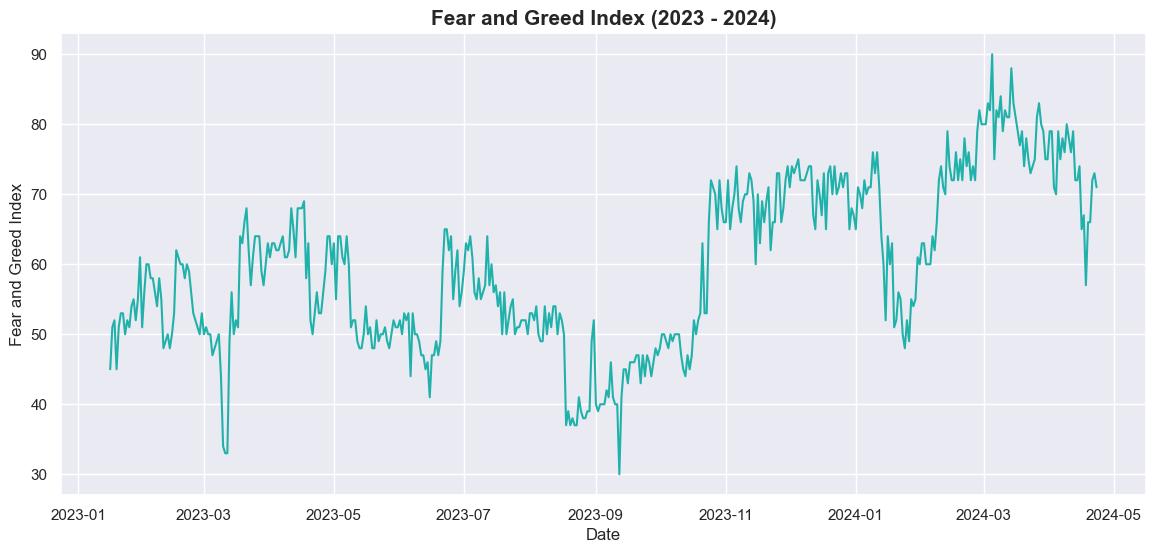

In [21]:
import requests
‚
def fetch_alternative_me(url: str, limit: int, data_format: str, date_format) -> pd.DataFrame:
    """ Fetch data from alternative.me API.
    """
    # define parameters for the request
    parameters = {
        "limit":       limit,
        "format":      data_format,
        "date_format": date_format
    }

    # make request
    response = requests.get(
        url    = url,
        params = parameters
    )

    # try, except block to check whether the request was successful
    try:
        response.raise_for_status()

    except requests.exceptions.HTTPError as e:
        print(f" -> An error occured: {e}")
        return None

    else:
        print(" -> Request was successful.")
        return pd.DataFrame(response.json()["data"])

# Fetch the data
url         = "https://api.alternative.me/fng/"
limit       =  360 + 104 # 360 days + 104 days (1 year + 3 months of 2024)
date_format = "world"
data_format = "json"

data = fetch_alternative_me(url, limit, data_format, date_format)

# type cast the date column to datetime
data['date'] = pd.to_datetime(data['timestamp'], format='%d-%m-%Y')

# set the date column as the index
data.set_index('date', inplace=True)

# value to int
data['value'] = data['value'].astype(int)

# plot in darkmode
sns.set_theme(style='darkgrid')

# Create the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=data['value'], color='lightseagreen', linewidth=1.5)
plt.title('Fear and Greed Index (2023 - 2024)', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Fear and Greed Index')
plt.grid(True)

- Fear and greed index:

In [33]:
from fear_greed_index import CNNFearAndGreedIndex

cnn_fg = CNNFearAndGreedIndex()

# plot Fear and Greed charts
fig = plt.figure(figsize=(20, 7))
cnn_fg.plot_all_charts(fig)
plt.show()

# print Fear and Greed complete report
print(cnn_fg.get_complete_report())

TypeError: 'module' object is not callable

## Question 7. [Exploratory] Time-driven strategy description around earnings releases
---
Free text answer

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

---
- Earnings:
  - refer to the net profits that a company generates during a specific period, typically reported on a quarterly and annual basis. 
  - Earnings are a critical measure of a company's profitability and are closely watched by investors, analysts, and other stakeholders. 
  - They are reported as "earnings per share" (EPS), which is calculated by dividing the company's net income by the number of its outstanding shares. Earnings reports often include other important financial information as well, such as revenue, expenses, profit margins, and guidance for future periods.
  - Importance:
    - They provide insight into how well a company is managing its finances and operations in the face of market conditions, competition, and internal challenges. 
    - **`Strong earnings often drive stock prices up, while weak earnings might lead to a decline in stock value!`**

---

- **NVIDIA**
  - 

In [4]:
import yfinance as yf

# Instantiate a Ticker object for Nvidia
nvidia = yf.Ticker('NVDA')

# Get financial data
financials = nvidia.financials
quarterly_financials = nvidia.quarterly_financials

# Display annual and quarterly financials
print(financials)
print(quarterly_financials)


                                                       2024-01-31  \
Tax Effect Of Unusual Items                                   0.0   
Tax Rate For Calcs                                           0.12   
Normalized EBITDA                                   35583000000.0   
Total Unusual Items                                           0.0   
Total Unusual Items Excluding Goodwill                        0.0   
Net Income From Continuing Operation Net Minori...  29760000000.0   
Reconciled Depreciation                              1508000000.0   
Reconciled Cost Of Revenue                          16621000000.0   
EBITDA                                              35583000000.0   
EBIT                                                34075000000.0   
Net Interest Income                                   609000000.0   
Interest Expense                                      257000000.0   
Interest Income                                       866000000.0   
Normalized Income                 

In [43]:
# Define the ticker symbol for Nvidia
nvda = yf.Ticker("NVDA")

# Fetch earnings dates
earnings_dates = nvda.earnings_dates

# index as datetime
earnings_dates.index = pd.to_datetime(earnings_dates.index)



# Define the start and end dates for the last half year
end_date = pd.to_datetime('2024-05-30').tz_localize(earnings_dates.index.tz)  # End date is the end of April with the same timezone awareness as earnings_dates
start_date = end_date - pd.DateOffset(months=6)  # Start date is six months ago from today

# Filter the earnings dates for the last half year
earnings_last_half_year = earnings_dates[(earnings_dates.index >= start_date) & (earnings_dates.index <= end_date)]


earnings_last_half_year



,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-05-22 06:00:00-04:00,5.19,NaN,NaN
2024-03-19 11:00:00-04:00,4.35,4.84,0.1126
2024-02-28 21:00:00-05:00,4.35,4.84,0.1126
2024-02-28 12:00:00-05:00,4.35,4.84,0.1126
2024-02-21 16:00:00-05:00,4.64,5.16,0.1132
2024-02-15 13:00:00-05:00,4.35,4.84,0.1126
2024-02-15 12:00:00-05:00,4.35,4.84,0.1126
2024-02-01 04:00:00-05:00,4.35,4.84,0.1126
2024-01-31 04:00:00-05:00,3.37,4.02,0.1929


In [64]:

data = {
    ticker: yf.Ticker(ticker).earnings_dates for ticker in ["NVDA", "MSFT", "AMD", "AAPL"]
}

# convert index to datetime for all dfs
for df in data.values():
    df.index = pd.to_datetime(df.index)

# Define the start and end dates for the last half year
end_date = pd.to_datetime('2024-05-30').tz_localize(earnings_dates.index.tz)
start_date = end_date - pd.DateOffset(months=12)

# filter the earnings dates for the last half year
earnings_last_half_year = {
    ticker: df[(df.index >= start_date) & (df.index <= end_date)] for ticker, df in data.items()
}

nvda, msft, amd, aapl = earnings_last_half_year.values()

# Display the earnings dates for the last half year
aapl


,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-05-02 17:00:00-04:00,1.41,NaN,NaN
2024-05-02 16:00:00-04:00,1.41,NaN,NaN
2024-02-01 16:00:00-05:00,2.10,2.18,0.0390
2023-11-02 16:00:00-04:00,1.39,1.46,0.0492
2023-08-03 16:00:00-04:00,1.19,1.26,0.0549


In [66]:
nvda

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-05-22 06:00:00-04:00,5.19,NaN,NaN
2024-03-19 11:00:00-04:00,4.35,4.84,0.1126
2024-02-28 21:00:00-05:00,4.35,4.84,0.1126
2024-02-28 12:00:00-05:00,4.35,4.84,0.1126
2024-02-21 16:00:00-05:00,4.64,5.16,0.1132
2024-02-15 13:00:00-05:00,4.35,4.84,0.1126
2024-02-15 12:00:00-05:00,4.35,4.84,0.1126
2024-02-01 04:00:00-05:00,4.35,4.84,0.1126
2024-01-31 04:00:00-05:00,3.37,4.02,0.1929


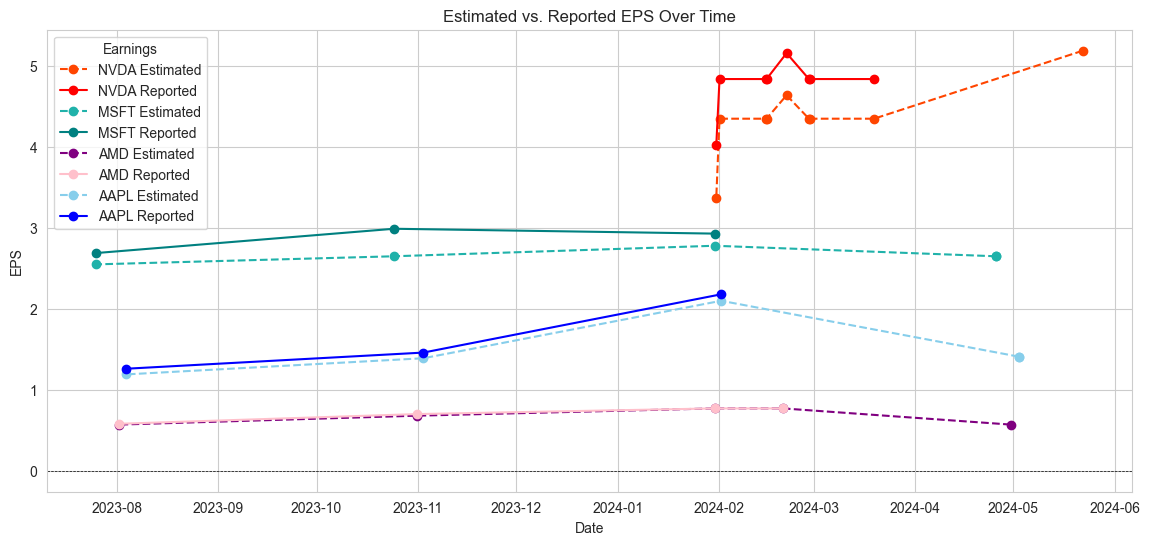

In [70]:
fig, ax = plt.subplots(figsize=(14, 6))

# Nvidia
plt.plot(nvda.index, nvda['EPS Estimate'], label='NVDA Estimated', marker='o', color='orangered', linestyle='--')
plt.plot(nvda.index, nvda['Reported EPS'], label='NVDA Reported', marker='o', color='red')

# Microsoft
plt.plot(msft.index, msft['EPS Estimate'], label='MSFT Estimated', marker='o', color='lightseagreen', linestyle='--')
plt.plot(msft.index, msft['Reported EPS'], label='MSFT Reported', marker='o', color='teal')

# AMD
plt.plot(amd.index, amd['EPS Estimate'], label='AMD Estimated', marker='o', color='purple', linestyle='--')
plt.plot(amd.index, amd['Reported EPS'], label='AMD Reported', marker='o', color='pink')

# Apple
plt.plot(aapl.index, aapl['EPS Estimate'], label='AAPL Estimated', marker='o', color='skyblue', linestyle='--')
plt.plot(aapl.index, aapl['Reported EPS'], label='AAPL Reported', marker='o', color='blue')

# legend
plt.legend(title='Earnings', loc='upper left')
# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('EPS')
plt.title('Estimated vs. Reported EPS Over Time')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

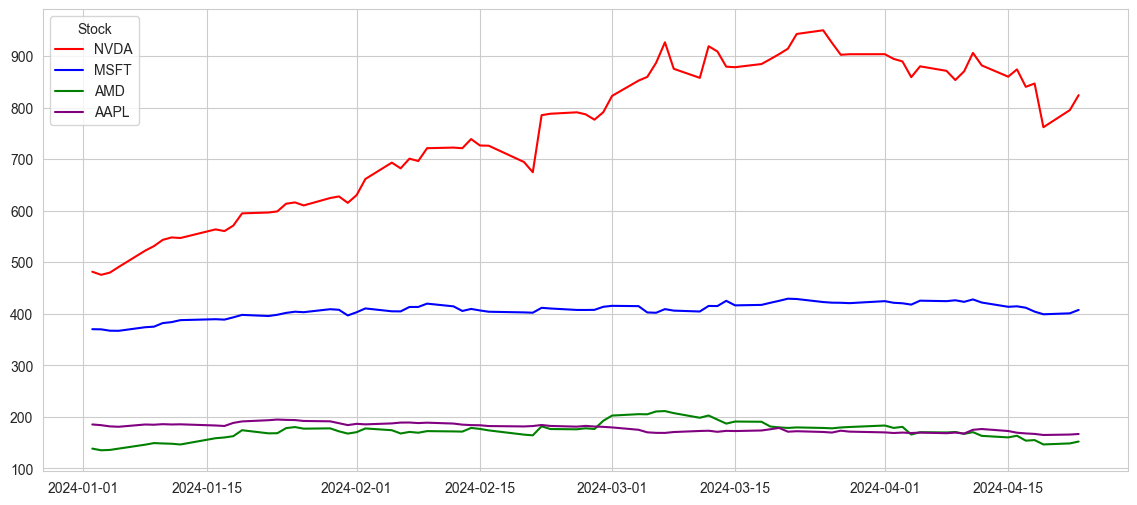

In [74]:
# adj closing prices
data = {
    ticker: yf.Ticker(ticker).history(start='2024-01-01', end='2024-05-30') for ticker in ["NVDA", "MSFT", "AMD", "AAPL"]
}

# convert index to datetime for all dfs
for df in data.values():
    df.index = pd.to_datetime(df.index)

nvda, msft, amd, aapl = data.values()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the adjusted closing prices
plt.plot(nvda.index, nvda['Close'], label='NVDA', color='red')
plt.plot(msft.index, msft['Close'], label='MSFT', color='blue')
plt.plot(amd.index, amd['Close'], label='AMD', color='green')
plt.plot(aapl.index, aapl['Close'], label='AAPL', color='purple')
plt.legend(title='Stock', loc='upper left')

Additional Analyses and Strategies
With the earnings dates and historical stock prices at hand, you can perform various analyses:

Volatility Analysis: Measure stock price volatility before and after earnings releases.
Price Reaction: Study how the stock price typically reacts to earnings announcements. Does it tend to spike? Drop? Remain stable?
Comparative Analysis: Compare Nvidia’s earnings date stock movements with industry peers like AMD or Intel to see if there are industry-wide trends.

Adj Close Price Comparison: Plot the adjusted closing prices of the companies of interest over the same time period as the earnings data. This can help identify any notable price movements around earnings releases and assess their impact on stock prices.
Price Change Distribution: Visualize the distribution of price changes (e.g., daily percentage changes) for each company around earnings dates. You can use histograms or kernel density plots to visualize the distribution and identify any patterns or outliers.
Price-Volume Relationship: Plot the relationship between adjusted closing prices and trading volume around earnings dates. This can help assess the strength of price movements and whether they are accompanied by significant trading activity.
Correlation Analysis: Conduct correlation analysis between EPS surprises and price movements to identify any relationships between earnings surprises and stock price reactions. Scatter plots can be useful for visualizing this relationship.
Moving Averages: Plot moving averages (e.g., 50-day and 200-day moving averages) of adjusted closing prices to identify trends and potential entry or exit points for trading strategies.
Volatility Analysis: Visualize historical volatility (e.g., using Bollinger Bands) to assess the level of price volatility around earnings dates and identify potential trading opportunities based on volatility patterns.
Relative Strength Comparison: Compare the relative strength of each company's stock price performance against a benchmark index (e.g., S&P 500) to assess whether the company is outperforming or underperforming the broader market.
Event Study Analysis: Conduct an event study analysis to analyze the impact of earnings announcements on stock prices using event study methodology. This involves plotting cumulative abnormal returns (CARs) or excess returns around earnings dates to assess market reactions.